In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
X = df.drop(columns=['math_score'],axis=1)

In [4]:
y = df['math_score']

In [5]:
num_feature = X.select_dtypes(exclude='object').columns
cat_feature = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

perprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_feature),
        ("StandardScaler",numeric_transformer,num_feature),
    ]
)


In [6]:
X = perprocessor.fit_transform(X)

In [7]:
X.shape

(1000, 19)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [17]:
def evaluate(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_sco = r2_score(true,predicted)
    return mae,mse,rmse,r2_sco

In [21]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbour Regressor" : KNeighborsRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBoost Regressor" : XGBRegressor(),
    "Catboosting Regressor" : CatBoostRegressor(verbose=False),
    "AdaBoost Regressor" : AdaBoostRegressor()
}
model_list =[]
r2_list = []

for i in range(len(list(models))):
    print(i+1)
    model = list(models.values())[i]
    model.fit(X_train,y_train)


    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    y_train_mae,y_train_mse,y_train_rmse,y_train_r2_score = evaluate(y_train,y_train_pred)
    y_test_mae,y_test_mse,y_test_rmse,y_test_r2_score = evaluate(y_test,y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance training set")
    print("-Mean Absolute Error:- {:.4f}".format(y_train_mae))
    print("-Mean square Error:- {:.4f}".format(y_train_mse))
    print("-Root Mean square Error:- {:.4f}".format(y_train_rmse))
    print("-r2 Score:- {:.4f}".format(y_train_r2_score))

    print("---------------------------------------")

    print("Model performance test set")
    print("-Mean Absolute Error:- {:.4f}".format(y_test_mae))
    print("-Mean square Error:- {:.4f}".format(y_test_mse))
    print("-Root Mean square Error:- {:.4f}".format(y_test_rmse))
    print("-r2 Score:- {:.4f}".format(y_test_r2_score))

    r2_list.append(y_test_r2_score)
    print("="*30)
    print("\n")


1
Linear Regression
Model performance training set
-Mean Absolute Error:- 4.2667
-Mean square Error:- 28.3349
-Root Mean square Error:- 5.3231
-r2 Score:- 0.8743
---------------------------------------
Model performance test set
-Mean Absolute Error:- 4.2148
-Mean square Error:- 29.0952
-Root Mean square Error:- 5.3940
-r2 Score:- 0.8804


2
Lasso
Model performance training set
-Mean Absolute Error:- 5.2063
-Mean square Error:- 43.4784
-Root Mean square Error:- 6.5938
-r2 Score:- 0.8071
---------------------------------------
Model performance test set
-Mean Absolute Error:- 5.1579
-Mean square Error:- 42.5064
-Root Mean square Error:- 6.5197
-r2 Score:- 0.8253


3
Ridge
Model performance training set
-Mean Absolute Error:- 4.2650
-Mean square Error:- 28.3378
-Root Mean square Error:- 5.3233
-r2 Score:- 0.8743
---------------------------------------
Model performance test set
-Mean Absolute Error:- 4.2111
-Mean square Error:- 29.0563
-Root Mean square Error:- 5.3904
-r2 Score:- 0.8806


In [24]:
df_eval = pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model name',"R2 Score"]).sort_values(by = ["R2 Score"],ascending=False)
df_eval


,Model name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,AdaBoost Regressor,0.853087
6,Catboosting Regressor,0.851632
4,Random Forest Regressor,0.847796
5,XGBoost Regressor,0.827797
1,Lasso,0.825320
3,K-Neighbour Regressor,0.783898


In [25]:
lin_model = Ridge(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.06


Text(0, 0.5, 'Predicted')

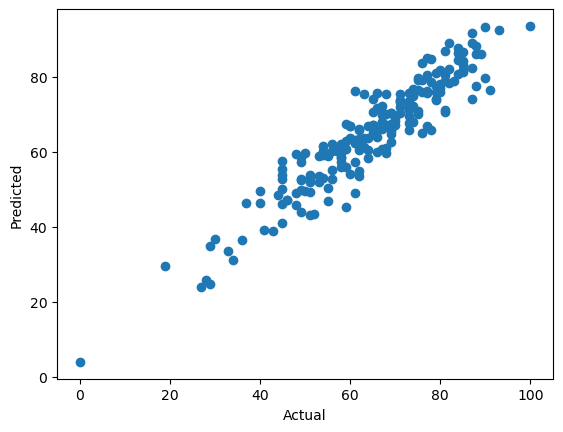

In [26]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

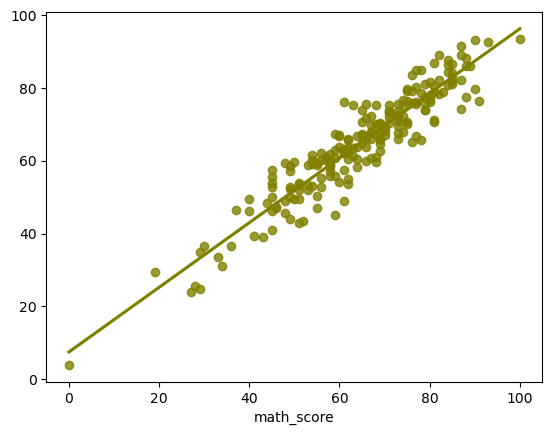

In [28]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='OLIVE')

In [34]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df.sort_values(by=["Difference"],ascending=False,inplace=True)
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.398705,14.601295
265,59,45.167633,13.832367
859,87,74.115900,12.884100
199,78,65.735421,12.264579
867,61,48.913551,12.086449
...,...,...,...
787,19,29.518226,-10.518226
589,48,59.297098,-11.297098
318,63,75.305107,-12.305107
371,45,57.456655,-12.456655
